## Training a model to recognize sentiment : Text Classification Model

#### Hemant Thapa

In our recent project, we developed a text classification model aimed at efficiently processing and categorising text data. The model, trained on a dataset of 20,000 samples and tested on 6,709 samples, utilises a sequential framework, known for its effectiveness in natural language processing tasks.

The architecture of the model includes an Embedding layer with 160,000 parameters, designed to process textual input. This is followed by a GlobalAveragePooling1D layer, which reduces data dimensionality while preserving important information. The model also comprises two Dense layers; the first with 24 units and the second with one unit, together adding 433 parameters. These layers are responsible for interpreting features and making the final prediction.


Tokenizer class instance was created with a 10,000 word limit and an out-of-vocabulary token ```<OOV>```. After fitting this tokenizer to the training sentences, we converted both training and testing sentences into sequences of integers. These sequences were then equalized in length (100 words max) using padding and truncating techniques, ensuring consistent input size for the model.

##### Importing Libraries 

In [1]:
import io
import json
import requests
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

##### Loading Json dataset 

In [3]:
def load_json_dataset(url):
    response = requests.get(url)
    
    if response.status_code == 200:
        datastore = json.loads(response.text)
    
        sentences = []
        labels = []
    
        for item in datastore:
            sentences.append(item['headline'])
            labels.append(item['is_sarcastic'])
        
        return datastore, sentences, labels
    else:
        print(f"Failed to fetch data from URL. Status code: {response.status_code}")
        return None, None, None

In [4]:
datastore, sentences, labels = load_json_dataset("https://storage.googleapis.com/learning-datasets/sarcasm.json")

In [5]:
datastore[:5]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [6]:
sentences[:5]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way']

In [7]:
labels[:10]

[0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

##### Exporting Json file to text format 

In [8]:
if datastore:
    print(f"Loaded {len(sentences)} sentences and {len(labels)} labels.")
    #save datastore to a text file
    with open("datastore.txt", "w") as outfile:
        json.dump(datastore, outfile)
else:
    print("Data loading failed.")

Loaded 26709 sentences and 26709 labels.


##### Feature Engineering - Train and Test Size 

In [9]:
training_size = 20000

In [10]:
print(f"Training size of data : {training_size}")
print(f"Testing size of data : {len(sentences) - training_size}")

Training size of data : 20000
Testing size of data : 6709


In [11]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

In [12]:
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [13]:
#an object of tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")

In [14]:
#fitting model
tokenizer.fit_on_texts(training_sentences)

In [15]:
#word index
word_index = tokenizer.word_index

In [16]:
#text to sequences 
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

In [17]:
#padding 
training_padded = pad_sequences(training_sequences, maxlen=100, padding='post', truncating='post')
testing_padded = pad_sequences(testing_sequences, maxlen=100, padding='post', truncating='post')

In [18]:
#comverting to numpy array
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

##### Selecting Model 

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6616 - accuracy: 0.5935 - val_loss: 0.5642 - val_accuracy: 0.7570 - 3s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4161 - accuracy: 0.8381 - val_loss: 0.3927 - val_accuracy: 0.8262 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3020 - accuracy: 0.8808 - val_loss: 0.3532 - val_accuracy: 0.8504 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 1s - loss: 0.2525 - accuracy: 0.9013 - val_loss: 0.3473 - val_accuracy: 0.8520 - 1s/epoch - 2ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2162 - accuracy: 0.9169 - val_loss: 0.3488 - val_accuracy: 0.8551 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 1s - loss: 0.1899 - accuracy: 0.9275 - val_loss: 0.3566 - val_accuracy: 0.8542 - 1s/epoch - 2ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1673 - accuracy: 0.9390 - val_loss: 0.3875 - val_accuracy: 0.8441 - 1s/epoch - 2ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1484 - accuracy: 0.9465 - val_loss: 0.3972 - val_accuracy: 0.8462 - 2s/epoch - 2ms/step
Epoch 9/30
625/625 - 2s 

##### Loss and Accuracy plot 

In [22]:
def plot_graphs(history, string, title=None, xlabel="Epochs", ylabel=None):
    plt.figure(figsize=(6, 5))
    epochs = range(1, len(history.history[string]) + 1)
    train_values = history.history[string]
    val_values = history.history['val_' + string]
    #initialise to none
    intersection_indices = None 
    for i in range(len(train_values) - 1):
        if (train_values[i] <= val_values[i] and train_values[i + 1] >= 
            val_values[i + 1]) or (train_values[i] >= val_values[i] and train_values[i + 1] <= val_values[i + 1]):
            intersection_indices = i
    
    linestyle = ['-'] * len(epochs) 
    #linestyle to dashed only at the intersection point
    if intersection_indices is not None:
        linestyle[intersection_indices] = '--'
    
    plt.plot(epochs, train_values, linestyle='-', color='blue', label='Training ' + string)
    plt.plot(epochs, val_values, linestyle='-', color='green', label='Validation ' + string)
    
    #scatter point at the intersection point on the training set line
    if intersection_indices is not None:
        intersection_epoch = intersection_indices + 1  
        intersection_value = train_values[intersection_indices]
        plt.scatter(intersection_epoch, intersection_value, marker='o', color='red', label=f'Intersection (Train: {intersection_value:.2f})')
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, linestyle='--', color='black', alpha=0.2)
    plt.show()

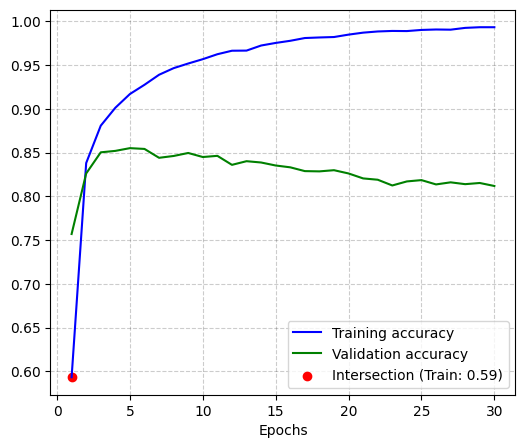

In [23]:
plot_graphs(history, "accuracy")

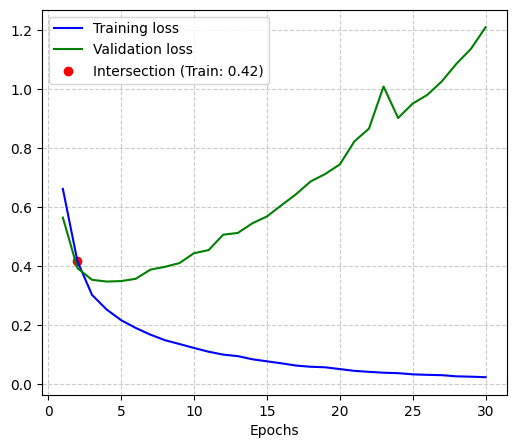

In [24]:
plot_graphs(history, "loss")

In [25]:
#inversing word index
reverse_word_index = {}
for key, value in word_index.items():
    reverse_word_index[value] = key

In [26]:
#decoding sentence
def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [27]:
print(decode_sentence(training_padded[0]))

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?


In [28]:
print(training_sentences[2])

mom starting to fear son's web series closest thing she will have to grandchild


In [29]:
print(labels[2])

1


In [30]:
#vocab_size, embedding_dim
e = model.layers[0]
weights = e.get_weights()[0]

In [31]:
print(weights.shape) 

(10000, 16)


In [32]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, 10000):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [33]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]

In [34]:
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [35]:
predictions = model.predict(padded)

1/1 [==============================] - 0s 91ms/step


In [36]:
np.set_printoptions(suppress=True)

In [37]:
print(predictions)

[[0.7227658 ]
 [0.00000081]]


Close to 1 : High probability of sarcasm

Close to 0 : Low probability of sarcasm 

In [38]:
def text_classification_test(string):
    temp_sequences = tokenizer.texts_to_sequences([string])
    temp_padded = pad_sequences(temp_sequences, maxlen=100, padding='post', truncating='post')
    temp_predictions = model.predict(temp_padded)
    #model returns a single prediction value
    sentiment_score = temp_predictions[0]  
    classification = ""

    if sentiment_score < -0.4:
        classification = "Very Bad"
    elif sentiment_score < 0:
        classification = "Bad"
    elif sentiment_score < 0.5:
        classification = "Not Bad"
    else:
        classification = "Good"

    print(f"Text: {string}")
    print(f"Sentiment Score: {sentiment_score}")
    print(f"Classification: {classification}")

In [39]:
text_classification_test("Oh, great! Another Monday to look forward to")

1/1 [==============================] - 0s 19ms/step
Text: Oh, great! Another Monday to look forward to
Sentiment Score: [0.98525023]
Classification: Good


In [40]:
text_classification_test("Wow, my day couldn't get any better! Another flat tire on my way to work in this pouring rain.")

1/1 [==============================] - 0s 29ms/step
Text: Wow, my day couldn't get any better! Another flat tire on my way to work in this pouring rain.
Sentiment Score: [0.00000777]
Classification: Not Bad


In [41]:
text_classification_test("I'm absolutely thrilled to be stuck in traffic for hours on a Friday evening.")

1/1 [==============================] - 0s 25ms/step
Text: I'm absolutely thrilled to be stuck in traffic for hours on a Friday evening.
Sentiment Score: [0.9978672]
Classification: Good


In [42]:
text_classification_test("I just won the lottery, and now I have to pay taxes on it! Life is so unfair.")

1/1 [==============================] - 0s 25ms/step
Text: I just won the lottery, and now I have to pay taxes on it! Life is so unfair.
Sentiment Score: [0.]
Classification: Not Bad


**References:**

**Book:**

- *Sculpting Data for ML: The First Act of Machine Learning*
  - Authors: Jigyasa Grover, Rishabh Misra
  - Publisher: Jigyasa Grover & Rishabh Misra
  - Year: 2021
  - ISBN: 9798585463570
  - Page Count: 158
  - Language: English
  - Contributors: Julian McAuley, Laurence Moroney, Mengting Wan
ting Wan
